## CARGAR LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## SUBIR ARCHIVO Y EXTRAER RUTA

In [ ]:
ruta_archivo = "/content/Estadisticas_jugadores_V7.xlsx"
ruta_defensas = "/content/Estadisticas_jugadores_DF_V1.xlsx"
ruta_mediocampistas = "/content/Estadisticas_jugadores_MC_V1.xlsx"
ruta_delanteros = "/content/Estadisticas_jugadores_DC_V1.xlsx"

In [ ]:
ESTADISTICAS_TOTALES = pd.read_excel(ruta_archivo)
ESTADISTICAS_defensas = pd.read_excel(ruta_defensas)
ESTADISTICAS_mediocampistas = pd.read_excel(ruta_mediocampistas)
ESTADISTICAS_delanteros = pd.read_excel(ruta_delanteros)


In [ ]:
ESTADISTICAS_TOTALES = ESTADISTICAS_TOTALES.drop(["Jugador"], axis=1)
ESTADISTICAS_defensas = ESTADISTICAS_defensas.drop(["Jugador", "Posc"], axis=1)
ESTADISTICAS_mediocampistas = ESTADISTICAS_mediocampistas.drop(["Jugador", "Posc"], axis=1)
ESTADISTICAS_delanteros = ESTADISTICAS_delanteros.drop(["Jugador", "Posc"], axis=1)

In [ ]:
DEFENSAS_SUB20 = ESTADISTICAS_defensas[ESTADISTICAS_defensas['Edad'] <= 20]
MEDIOCAMPISTAS_SUB20 = ESTADISTICAS_mediocampistas[ESTADISTICAS_mediocampistas['Edad'] <= 20]
DELANTEROS_SUB20 = ESTADISTICAS_delanteros[ESTADISTICAS_delanteros['Edad'] <= 20]

In [ ]:
variables_categoricas = ESTADISTICAS_TOTALES.select_dtypes(include=['object']).columns
df_dummies = pd.get_dummies(ESTADISTICAS_TOTALES[variables_categoricas])
df_dummies = df_dummies.astype(int)
Variables_Cuantitativas = ESTADISTICAS_TOTALES.select_dtypes(include=['int64', 'float64']).columns
Variables_Cuantitativas = ESTADISTICAS_TOTALES[Variables_Cuantitativas.drop(["Nacimiento"])]
datos_dummies = pd.concat([Variables_Cuantitativas, df_dummies], axis=1)
ESTADISTICAS_TOTALES = datos_dummies
ESTADISTICAS = ESTADISTICAS_TOTALES[:-9]
Y=ESTADISTICAS_TOTALES["Precio 2023-2024"]
ESTADISTICAS_TOTALES=ESTADISTICAS_TOTALES.drop(["Precio 2023-2024"], axis=1)
Z = ESTADISTICAS_TOTALES.tail(9).copy()
Z1 = Y.tail(9).copy()

In [ ]:
DEFENSAS = ESTADISTICAS[ESTADISTICAS['Posc_DF'] == 1]
MEDIOCAMPISTAS = ESTADISTICAS[ESTADISTICAS['Posc_MC'] == 1]
DELANTEROS = ESTADISTICAS[ESTADISTICAS['Posc_DC'] == 1]
Z_DF = Z[Z['Posc_DF'] == 1]
Z_MC = Z[Z['Posc_MC'] == 1]
Z_DC = Z[Z['Posc_DC'] == 1]
Z1_DF = Z1.iloc[-9:-6].copy()
Z1_MC = Z1.iloc[-6:-3].copy()
Z1_DC = Z1.tail(3).copy()

In [ ]:
try:
    Resultados
except NameError:
    Resultados = pd.DataFrame(columns=['Modelo', 'R2', 'RMSE', 'R2_Validacion', 'RMSE_Validacion', 'R2_Prueba', 'RMSE_Prueba'], dtype=float)

## RANDOM FOREST REGRESSOR PARA VARIABLES CUANTITATIVAS PARA LOS DEFENSORES SUB20

### FILTRAR Y TRANSFORMAR INFORMACION

In [ ]:
X=DEFENSAS_SUB20
Y=X["Precio 2023-2024"]
X=X.drop(["País", "Equipo", "Comp", "Nacimiento", "Precio 2023-2024"], axis=1)
Z_DEFENSAS = X.tail(3).copy()
Z1_DEFENSAS = Y.tail(3).copy()
X = X[:-3]
Y = Y[:-3]
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state = 50)

### INICIALIZAR MODELO

In [ ]:
rf_regressor = RandomForestRegressor(max_depth=8, max_samples=0.8, random_state = 20)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_samples=0.8, random_state=20)

### APLICAR EL MODELO

In [ ]:
y_pred = rf_regressor.predict(X_test)
Resultados.loc[len(Resultados)] = ['Defensas_Sub20', None, None, None, None, None, None]
Resultados.loc[Resultados['Modelo'] == 'Defensas_Sub20', 'R2'] = r2_score(y_test, y_pred)
Resultados.loc[Resultados['Modelo'] == 'Defensas_Sub20', 'RMSE'] = mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### ERROR DE PREDICCION

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


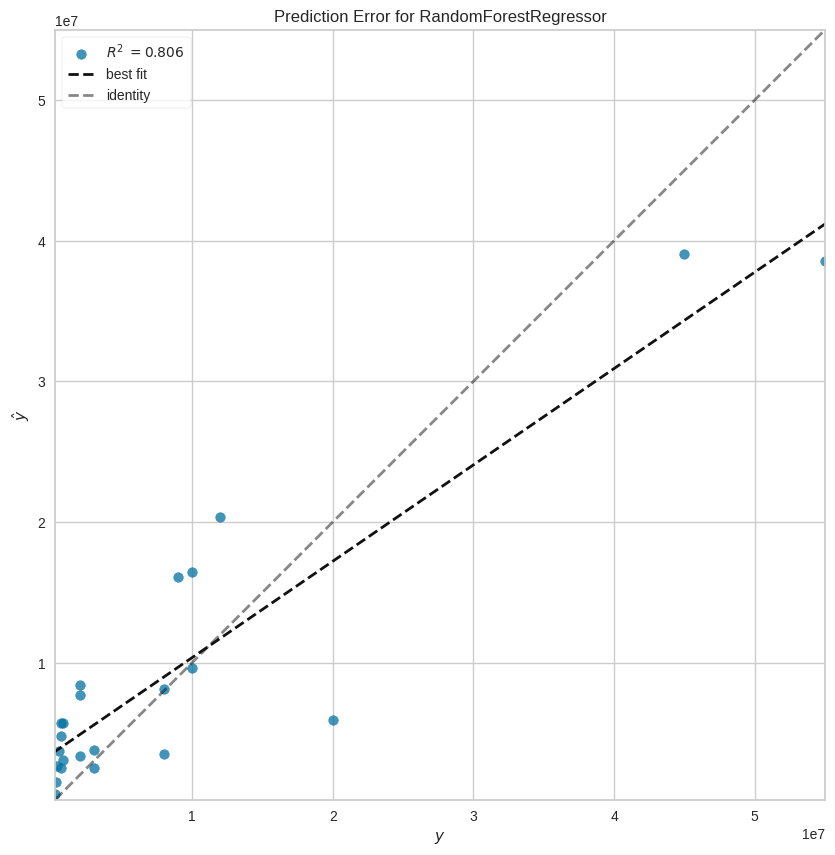

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf_regressor)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### R2 DE PRUEBA Y DE TEST

In [ ]:
pred_train=rf_regressor.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=rf_regressor.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")

El R2 de entrenamiento es  89.94 %
El R2 de prueba es  80.57 %


### RANKING VARIABLES

In [ ]:
importancias = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
Precio 2022-2023,0.692716
PrgP,0.069013
DA_Ganados,0.021644
Edad,0.021126
Pcz,0.015640
PrgR,0.012228
B_Bloqueos,0.010137
Des_Tkl,0.010124
B_Desp,0.009863
FR,0.009764


### VALIDACION CRUZADA

In [ ]:
cv = KFold(n_splits = 5, shuffle=True, random_state = 20)

In [ ]:
accuracy_cross_val_r2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
accuracy_cross_val_rmse2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'neg_root_mean_squared_error', # Use 'neg_root_mean_squared_error' for RMSE
                                       cv = cv)

In [ ]:
Resultados.loc[Resultados['Modelo'] == 'Defensas_Sub20', 'R2_Validacion'] = round(accuracy_cross_val_r2.mean(), 3)
Resultados.loc[Resultados['Modelo'] == 'Defensas_Sub20', 'RMSE_Validacion'] = round(accuracy_cross_val_rmse2.mean(), 3)

### VALIDAR EL MODELO

In [ ]:
y_pred_validation = rf_regressor.predict(Z_DEFENSAS)
Resultados.loc[Resultados['Modelo'] == 'Defensas_Sub20', 'R2_Prueba'] = r2_score(Z1_DEFENSAS, y_pred_validation)
Resultados.loc[Resultados['Modelo'] == 'Defensas_Sub20', 'RMSE_Prueba'] = mean_squared_error(Z1_DEFENSAS, y_pred_validation, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
prediccion = rf_regressor.predict(Z_DEFENSAS)
Z_DEFENSAS['Predicciones'] = prediccion
prediccion

array([30499757.57575757,  3482328.37701944,  9969725.10822511])

## RANDOM FOREST REGRESSOR PARA VARIABLES CUANTITATIVAS PARA LOS MEDIOCAMPISTAS SUB20

### FILTRAR Y TRANSFORMAR INFORMACION

In [ ]:
X=MEDIOCAMPISTAS_SUB20
Y=X["Precio 2023-2024"]
X=X.drop(["País", "Equipo", "Comp", "Nacimiento", "Precio 2023-2024"], axis=1)
Z_MEDIOCAMPISTAS = X.tail(3).copy()
Z1_MEDIOCAMPISTAS = Y.tail(3).copy()
X = X[:-3]
Y = Y[:-3]
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state = 50)

### INICIALIZAR MODELO

In [ ]:
rf_regressor = RandomForestRegressor(max_depth=8, max_samples=0.8, random_state = 20)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_samples=0.8, random_state=20)

### APLICAR EL MODELO

In [ ]:
y_pred = rf_regressor.predict(X_test)
Resultados.loc[len(Resultados)] = ['Mediocampistas_Sub20', None, None, None, None, None, None]
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas_Sub20', 'R2'] = r2_score(y_test, y_pred)
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas_Sub20', 'RMSE'] = mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### ERROR DE PREDICCION

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


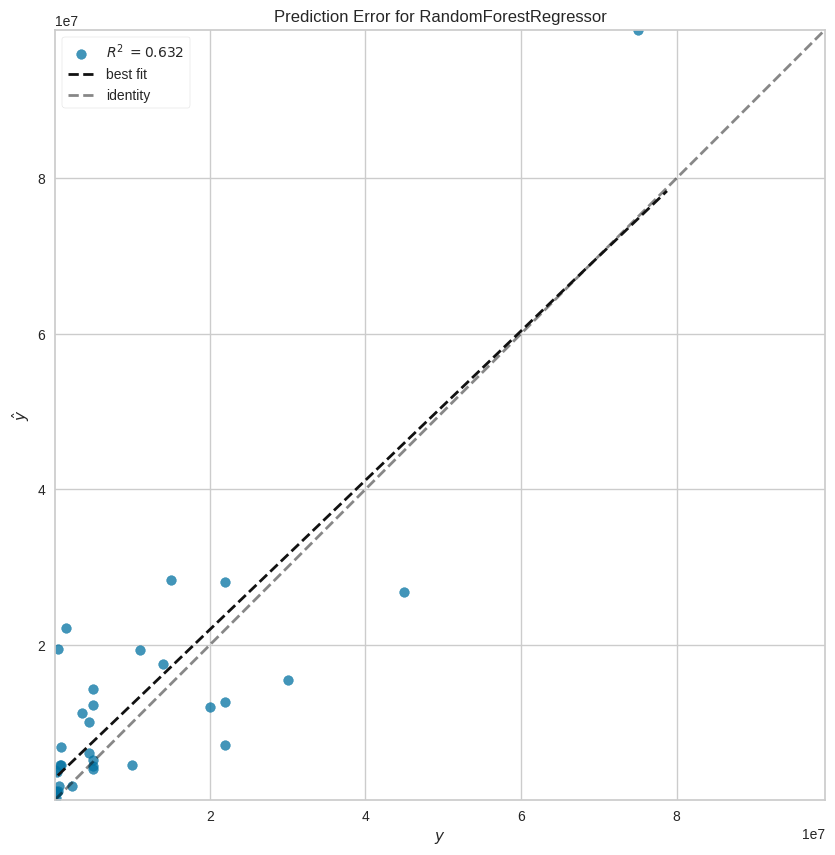

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf_regressor)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### R2 DE PRUEBA Y DE TEST

In [ ]:
pred_train=rf_regressor.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=rf_regressor.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")

El R2 de entrenamiento es  92.2 %
El R2 de prueba es  63.18 %


### RANKING VARIABLES

In [ ]:
importancias = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
Precio 2022-2023,0.501736
Cint,0.080496
CCmp,0.069753
Dist,0.029530
PrgP,0.029134
SCA90,0.026092
Tint,0.021971
TCmp,0.019804
PPA,0.017282
ACT,0.015983


### VALIDACION CRUZADA

In [ ]:
cv = KFold(n_splits = 5, shuffle=True, random_state = 20)

In [ ]:
accuracy_cross_val_r2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
accuracy_cross_val_rmse2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'neg_root_mean_squared_error', # Use 'neg_root_mean_squared_error' for RMSE
                                       cv = cv)

In [ ]:
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas_Sub20', 'R2_Validacion'] = round(accuracy_cross_val_r2.mean(), 3)
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas_Sub20', 'RMSE_Validacion'] = round(accuracy_cross_val_rmse2.mean(), 3)

### VALIDAR EL MODELO

In [ ]:
y_pred_validation = rf_regressor.predict(Z_MEDIOCAMPISTAS)
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas_Sub20', 'R2_Prueba'] = r2_score(Z1_MEDIOCAMPISTAS, y_pred_validation)
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas_Sub20', 'RMSE_Prueba'] = mean_squared_error(Z1_MEDIOCAMPISTAS, y_pred_validation, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
prediccion = rf_regressor.predict(Z_MEDIOCAMPISTAS)
Z_MEDIOCAMPISTAS['Predicciones'] = prediccion
prediccion

array([ 1994544.38215529, 43505000.        , 13056436.68816408])

## RANDOM FOREST REGRESSOR PARA VARIABLES CUANTITATIVAS PARA LOS DELANTEROS SUB20

### FILTRAR Y TRANSFORMAR INFORMACION

In [ ]:
X=DELANTEROS_SUB20
Y=X["Precio 2023-2024"]
X=X.drop(["País", "Equipo", "Comp", "Nacimiento", "Precio 2023-2024"], axis=1)
Z_DELANTEROS = X.tail(3).copy()
Z1_DELANTEROS = Y.tail(3).copy()
X = X[:-3]
Y = Y[:-3]
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state = 50)

### INICIALIZAR MODELO

In [ ]:
rf_regressor = RandomForestRegressor(max_depth=8, max_samples=0.8, random_state = 20)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_samples=0.8, random_state=20)

### APLICAR EL MODELO

In [ ]:
y_pred = rf_regressor.predict(X_test)
Resultados.loc[len(Resultados)] = ['Delanteros_Sub20', None, None, None, None, None, None]
Resultados.loc[Resultados['Modelo'] == 'Delanteros_Sub20', 'R2'] = r2_score(y_test, y_pred)
Resultados.loc[Resultados['Modelo'] == 'Delanteros_Sub20', 'RMSE'] = mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### ERROR DE PREDICCION

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


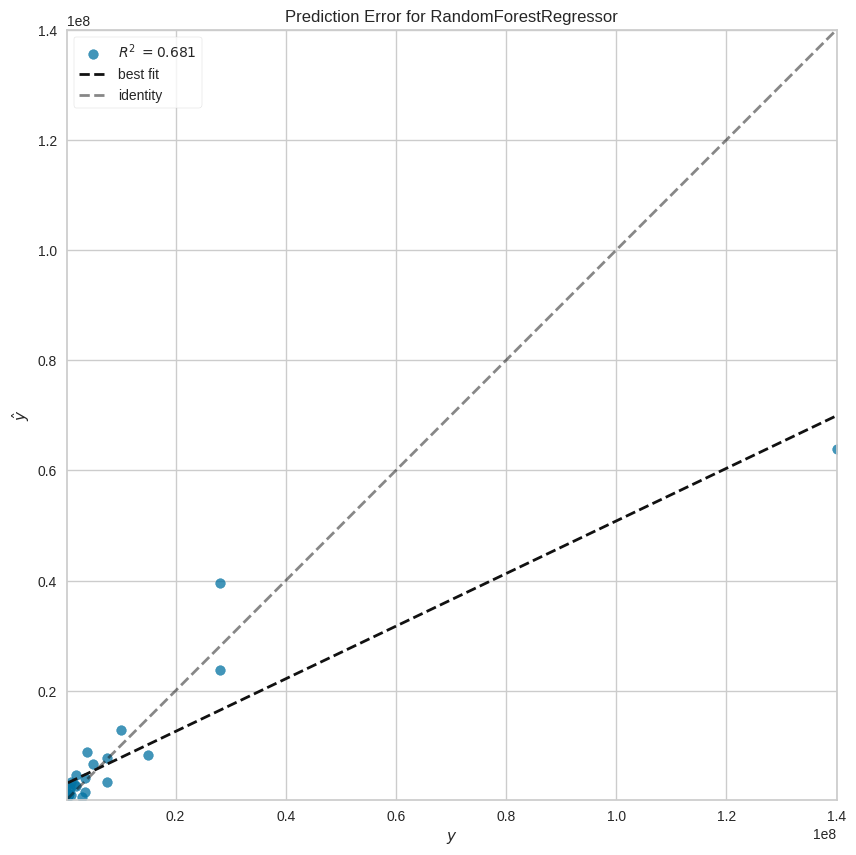

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf_regressor)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### R2 DE PRUEBA Y DE TEST

In [ ]:
pred_train=rf_regressor.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=rf_regressor.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")

El R2 de entrenamiento es  88.03999999999999 %
El R2 de prueba es  68.08999999999999 %


### RANKING VARIABLES

In [ ]:
importancias = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
Precio 2022-2023,5.901303e-01
Dap,4.311425e-02
G+A,3.606144e-02
ACT_Balon_muerto,3.296229e-02
DA_Ganados,3.215065e-02
ACT_Balon_vivo,2.029871e-02
PrgR,1.904623e-02
ACT,1.795057e-02
G/T,1.748092e-02
G+A-TP/90,1.542174e-02


### VALIDACION CRUZADA

In [ ]:
cv = KFold(n_splits = 5, shuffle=True, random_state = 20)

In [ ]:
accuracy_cross_val_r2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
accuracy_cross_val_rmse2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'neg_root_mean_squared_error', # Use 'neg_root_mean_squared_error' for RMSE
                                       cv = cv)

In [ ]:
Resultados.loc[Resultados['Modelo'] == 'Delanteros_Sub20', 'R2_Validacion'] = round(accuracy_cross_val_r2.mean(), 3)
Resultados.loc[Resultados['Modelo'] == 'Delanteros_Sub20', 'RMSE_Validacion'] = round(accuracy_cross_val_rmse2.mean(), 3)

### VALIDAR EL MODELO

In [ ]:
y_pred_validation = rf_regressor.predict(Z_DELANTEROS)
Resultados.loc[Resultados['Modelo'] == 'Delanteros_Sub20', 'R2_Prueba'] = r2_score(Z1_DELANTEROS, y_pred_validation)
Resultados.loc[Resultados['Modelo'] == 'Delanteros_Sub20', 'RMSE_Prueba'] = mean_squared_error(Z1_DELANTEROS, y_pred_validation, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
prediccion = rf_regressor.predict(Z_DELANTEROS)
Z_DELANTEROS['Predicciones'] = prediccion
prediccion

array([18961000., 41180000., 38420000.])

## RANDOM FOREST REGRESSOR PARA TODAS LAS VARIABLES DEFENSAS

### FILTRAR Y TRANSFORMAR INFORMACION

In [ ]:
X=DEFENSAS
Y=X["Precio 2023-2024"]
X=X.drop(["Precio 2023-2024"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state = 50)

### INICIALIZAR MODELO

In [ ]:
rf_regressor = RandomForestRegressor(max_depth=8, max_samples=0.8, random_state = 20)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_samples=0.8, random_state=20)

### APLICAR EL MODELO

In [ ]:
y_pred = rf_regressor.predict(X_test)
Resultados.loc[len(Resultados)] = ['Defensas', None, None, None, None, None, None]
Resultados.loc[Resultados['Modelo'] == 'Defensas', 'R2'] = r2_score(y_test, y_pred)
Resultados.loc[Resultados['Modelo'] == 'Defensas', 'RMSE'] = mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### ERROR DE PREDICCION

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


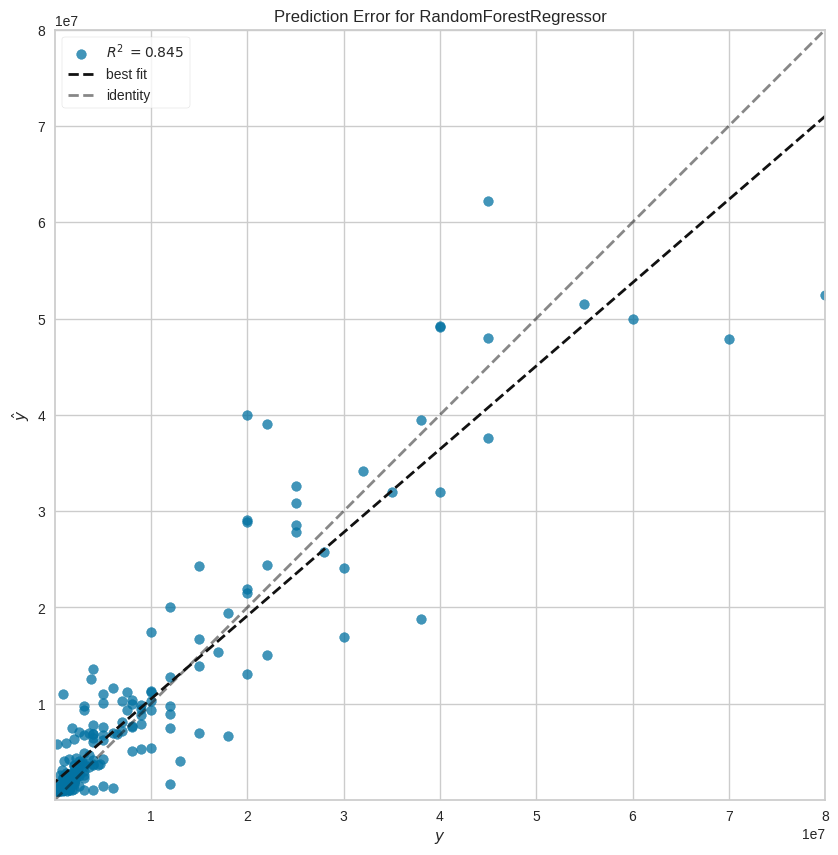

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf_regressor)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### R2 DE PRUEBA Y DE TEST

In [ ]:
pred_train=rf_regressor.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=rf_regressor.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")

El R2 de entrenamiento es  94.78999999999999 %
El R2 de prueba es  84.48 %


### RANKING VARIABLES

In [ ]:
importancias = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
Precio 2022-2023,0.788682
Edad,0.026861
Fls,0.012758
Tra_Dist_Tot,0.004924
Dist,0.003790
...,...
País_ua UKR,0.000000
País_uz UZB,0.000000
País_ve VEN,0.000000
País_wls WAL,0.000000


### VALIDACION CRUZADA

In [ ]:
cv = KFold(n_splits = 5, shuffle=True, random_state = 20)

In [ ]:
accuracy_cross_val_r2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
accuracy_cross_val_rmse2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'neg_root_mean_squared_error', # Use 'neg_root_mean_squared_error' for RMSE
                                       cv = cv)

In [ ]:
Resultados.loc[Resultados['Modelo'] == 'Defensas', 'R2_Validacion'] = round(accuracy_cross_val_r2.mean(), 3)
Resultados.loc[Resultados['Modelo'] == 'Defensas', 'RMSE_Validacion'] = round(accuracy_cross_val_rmse2.mean(), 3)

### VALIDAR EL MODELO

In [ ]:
y_pred_validation = rf_regressor.predict(Z_DF)
Resultados.loc[Resultados['Modelo'] == 'Defensas', 'R2_Prueba'] = r2_score(Z1_DF, y_pred_validation)
Resultados.loc[Resultados['Modelo'] == 'Defensas', 'RMSE_Prueba'] = mean_squared_error(Z1_DF, y_pred_validation, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
prediccion = rf_regressor.predict(Z_DF)
Z_DF['Predicciones'] = prediccion
prediccion

<ipython-input-52-e6f45a48c95a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_DF['Predicciones'] = prediccion


array([27600824.31457431, 10898737.63865695, 13347293.0252304 ])

In [ ]:
Z

,Edad,PJ,Titular,Min,90 s,Gls,Ast,G+A,G-TP,TP,...,Equipo_Villarreal,Equipo_Werder Bremen,Equipo_West Ham,Equipo_Wolfsburg,Equipo_Wolves,Comp_Bundesliga,Comp_La Liga,Comp_Ligue 1,Comp_Premier League,Comp_Serie A
2365,19,5,3,299.000,3.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2366,19,10,3,310.000,3.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2367,16,13,8,769.000,8.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2368,20,1,0,5.000,0.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2369,20,36,28,2.294,25.5,11,4,15,11,0,...,0,0,0,0,0,0,1,0,0,0
2370,20,1,0,4.000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2371,20,28,12,1.426,15.8,4,2,6,4,0,...,0,0,0,0,0,0,0,0,1,0
2372,20,36,32,2.656,29.5,6,4,10,6,0,...,0,0,0,0,0,0,1,0,0,0
2373,19,33,29,2.513,27.9,19,5,24,18,1,...,0,0,0,0,0,0,0,1,0,0


## RANDOM FOREST REGRESSOR PARA TODAS LAS VARIABLES MEDIOCAMPISTAS

### FILTRAR Y TRANSFORMAR INFORMACION

In [ ]:
X=MEDIOCAMPISTAS
Y=X["Precio 2023-2024"]
X=X.drop(["Precio 2023-2024"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state = 50)

### INICIALIZAR MODELO

In [ ]:
rf_regressor = RandomForestRegressor(max_depth=8, max_samples=0.8, random_state = 20)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_samples=0.8, random_state=20)

### APLICAR EL MODELO

In [ ]:
y_pred = rf_regressor.predict(X_test)
Resultados.loc[len(Resultados)] = ['Mediocampistas', None, None, None, None, None, None]
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas', 'R2'] = r2_score(y_test, y_pred)
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas', 'RMSE'] = mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### ERROR DE PREDICCION

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


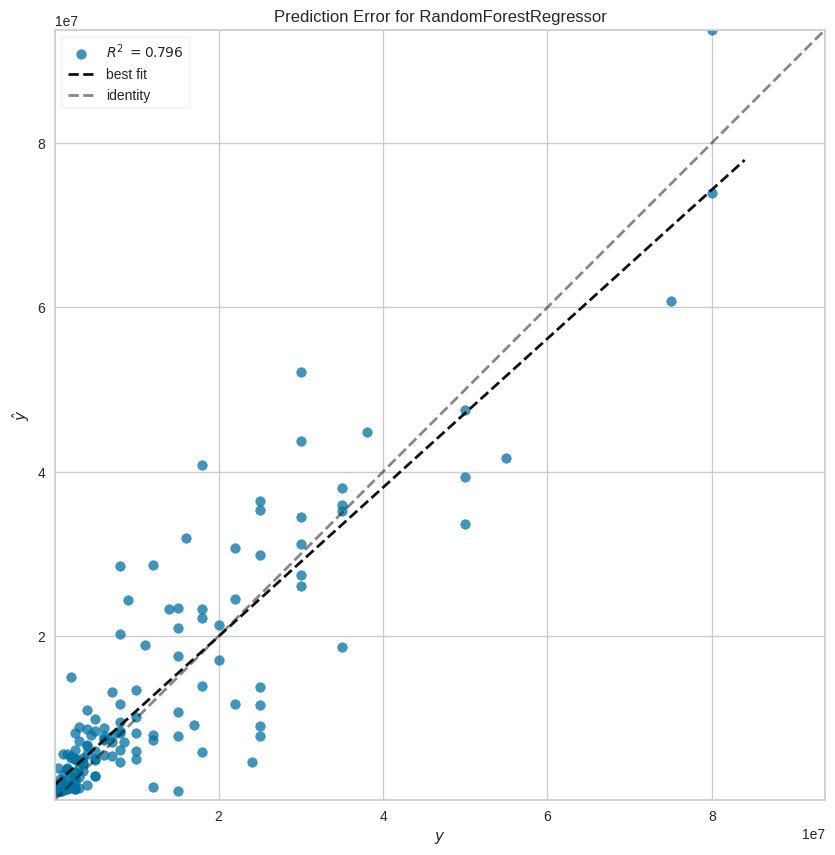

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf_regressor)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### R2 DE PRUEBA Y DE TEST

In [ ]:
pred_train=rf_regressor.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=rf_regressor.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")

El R2 de entrenamiento es  92.88 %
El R2 de prueba es  79.58 %


### RANKING VARIABLES

In [ ]:
importancias = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
Precio 2022-2023,0.780026
Equipo_Manchester Utd,0.010956
Edad,0.009637
LE_Dentro-Fuera,0.006908
SCA90,0.005041
...,...
País_py PAR,0.000000
País_ro ROU,0.000000
País_ru RUS,0.000000
País_si SVN,0.000000


### VALIDACION CRUZADA

In [ ]:
cv = KFold(n_splits = 5, shuffle=True, random_state = 20)

In [ ]:
accuracy_cross_val_r2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
accuracy_cross_val_rmse2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'neg_root_mean_squared_error', # Use 'neg_root_mean_squared_error' for RMSE
                                       cv = cv)

In [ ]:
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas', 'R2_Validacion'] = round(accuracy_cross_val_r2.mean(), 3)
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas', 'RMSE_Validacion'] = round(accuracy_cross_val_rmse2.mean(), 3)

### VALIDAR EL MODELO

In [ ]:
y_pred_validation = rf_regressor.predict(Z_MC)
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas', 'R2_Prueba'] = r2_score(Z1_MC, y_pred_validation)
Resultados.loc[Resultados['Modelo'] == 'Mediocampistas', 'RMSE_Prueba'] = mean_squared_error(Z1_MC, y_pred_validation, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
prediccion = rf_regressor.predict(Z_MC)
Z_MC['Predicciones'] = prediccion
prediccion

<ipython-input-64-f7024aa3e402>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_MC['Predicciones'] = prediccion


array([ 1332264.11285945, 36283349.99404471,  8771553.92771959])

## RANDOM FOREST REGRESSOR PARA TODAS LAS VARIABLES DELANTEROS

### FILTRAR Y TRANSFORMAR INFORMACION

In [ ]:
X=DELANTEROS
Y=X["Precio 2023-2024"]
X=X.drop(["Precio 2023-2024"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state = 50)

### INICIALIZAR MODELO

In [ ]:
rf_regressor = RandomForestRegressor(max_depth=8, max_samples=0.8, random_state = 20)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_samples=0.8, random_state=20)

### APLICAR EL MODELO

In [ ]:
y_pred = rf_regressor.predict(X_test)
Resultados.loc[len(Resultados)] = ['Delanteros', None, None, None, None, None, None]
Resultados.loc[Resultados['Modelo'] == 'Delanteros', 'R2'] = r2_score(y_test, y_pred)
Resultados.loc[Resultados['Modelo'] == 'Delanteros', 'RMSE'] = mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### ERROR DE PREDICCION

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


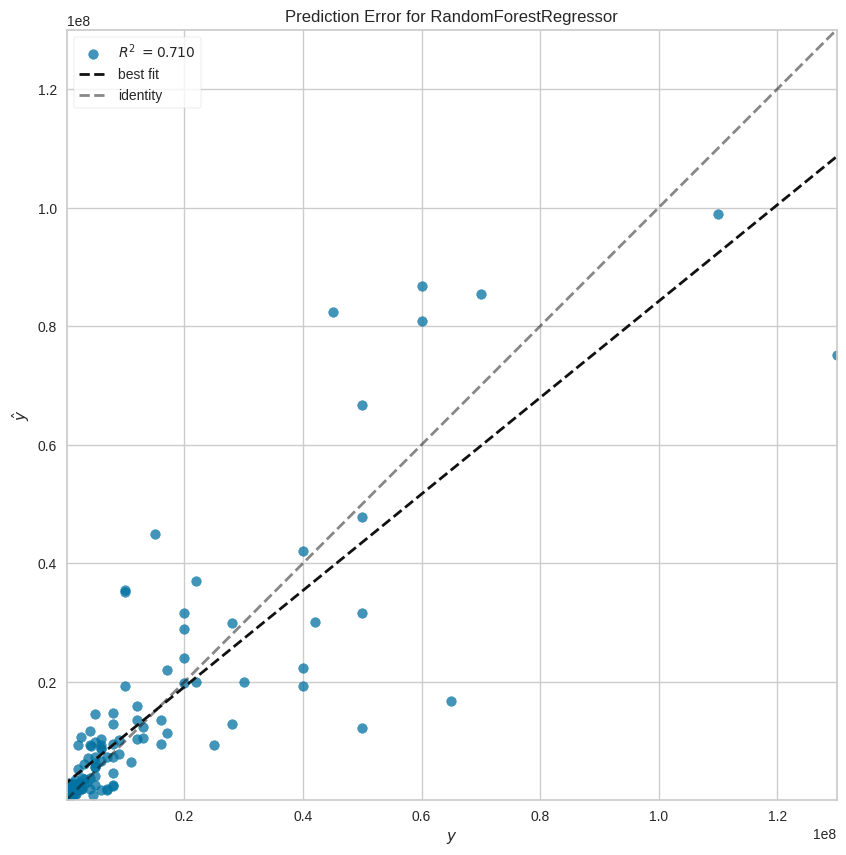

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf_regressor)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### R2 DE PRUEBA Y DE TEST

In [ ]:
pred_train=rf_regressor.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=rf_regressor.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")

El R2 de entrenamiento es  95.96000000000001 %
El R2 de prueba es  70.99 %


### RANKING VARIABLES

In [ ]:
importancias = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
Precio 2022-2023,0.799589
G-TP,0.010930
Edad,0.009323
T_Ataq_pen,0.007124
LE_PPP,0.006760
...,...
País_sr SUR,0.000000
País_tg TOG,0.000000
País_tn TUN,0.000000
País_tr TUR,0.000000


### VALIDACION CRUZADA

In [ ]:
cv = KFold(n_splits = 5, shuffle=True, random_state = 20)

In [ ]:
accuracy_cross_val_r2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
accuracy_cross_val_rmse2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'neg_root_mean_squared_error', # Use 'neg_root_mean_squared_error' for RMSE
                                       cv = cv)

In [ ]:
Resultados.loc[Resultados['Modelo'] == 'Delanteros', 'R2_Validacion'] = round(accuracy_cross_val_r2.mean(), 3)
Resultados.loc[Resultados['Modelo'] == 'Delanteros', 'RMSE_Validacion'] = round(accuracy_cross_val_rmse2.mean(), 3)

### VALIDAR EL MODELO

In [ ]:
y_pred_validation = rf_regressor.predict(Z_DC)
Resultados.loc[Resultados['Modelo'] == 'Delanteros', 'R2_Prueba'] = r2_score(Z1_DC, y_pred_validation)
Resultados.loc[Resultados['Modelo'] == 'Delanteros', 'RMSE_Prueba'] = mean_squared_error(Z1_DC, y_pred_validation, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
prediccion = rf_regressor.predict(Z_DC)
Z_DC['Predicciones'] = prediccion
prediccion

<ipython-input-75-8dd6c7f0633b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z_DC['Predicciones'] = prediccion


array([14412423.41728881, 37126543.3849776 , 46335203.10571781])

## RANDOM FOREST REGRESSOR PARA TODAS LAS VARIABLES TODAS LAS POSICIONES

### FILTRAR Y TRANSFORMAR INFORMACION

In [ ]:
X=ESTADISTICAS
Y=X["Precio 2023-2024"]
X=X.drop(["Precio 2023-2024"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.2, random_state = 50)

### INICIALIZAR MODELO

In [ ]:
rf_regressor = RandomForestRegressor(max_depth=8, max_samples=0.8, random_state = 20)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_samples=0.8, random_state=20)

### APLICAR EL MODELO

In [ ]:
y_pred = rf_regressor.predict(X_test)
Resultados.loc[len(Resultados)] = ['Todos', None, None, None, None, None, None]
Resultados.loc[Resultados['Modelo'] == 'Todos', 'R2'] = r2_score(y_test, y_pred)
Resultados.loc[Resultados['Modelo'] == 'Todos', 'RMSE'] = mean_squared_error(y_test, y_pred, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### ERROR DE PREDICCION

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


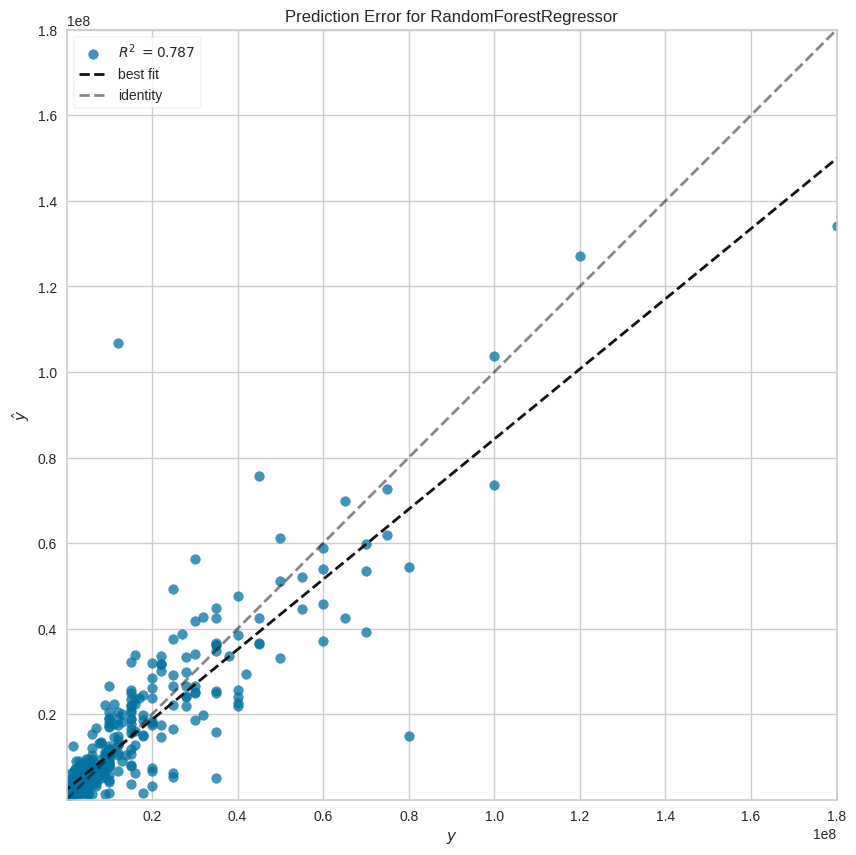

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf_regressor)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

### R2 DE PRUEBA Y DE TEST

In [ ]:
pred_train=rf_regressor.predict(X_train)
print("El R2 de entrenamiento es ",100*np.round(r2_score(y_train, pred_train),4), "%")
pred_test=rf_regressor.predict(X_test)
print("El R2 de prueba es ",100*np.round(r2_score(y_test, pred_test),4), "%")

El R2 de entrenamiento es  94.71000000000001 %
El R2 de prueba es  78.67 %


### RANKING VARIABLES

In [ ]:
importancias = rf_regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_regressor.estimators_],
             axis=0)
indices = np.argsort(importancias)[::-1]

Impor=pd.DataFrame(importancias, index=X_train.columns)
Impor.sort_values(by=0,  ascending=False)

,0
Precio 2022-2023,0.849707
Edad,0.022918
Equipo_Manchester Utd,0.004122
LCmp%,0.003405
Tra_Errores de control,0.003177
...,...
Equipo_Everton,0.000000
País_ro ROU,0.000000
Equipo_Empoli,0.000000
Equipo_Elche,0.000000


### VALIDACION CRUZADA

In [ ]:
cv = KFold(n_splits = 5, shuffle=True, random_state = 20)

In [ ]:
accuracy_cross_val_r2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
accuracy_cross_val_rmse2 = cross_val_score(estimator = rf_regressor,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'neg_root_mean_squared_error', # Use 'neg_root_mean_squared_error' for RMSE
                                       cv = cv)

In [ ]:
Resultados.loc[Resultados['Modelo'] == 'Todos', 'R2_Validacion'] = round(accuracy_cross_val_r2.mean(), 3)
Resultados.loc[Resultados['Modelo'] == 'Todos', 'RMSE_Validacion'] = round(accuracy_cross_val_rmse2.mean(), 3)

### VALIDAR EL MODELO

In [ ]:
y_pred_validation = rf_regressor.predict(Z)
Resultados.loc[Resultados['Modelo'] == 'Todos', 'R2_Prueba'] = r2_score(Z1, y_pred_validation)
Resultados.loc[Resultados['Modelo'] == 'Todos', 'RMSE_Prueba'] = mean_squared_error(Z1, y_pred_validation, squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
prediccion = rf_regressor.predict(Z)
Z['Predicciones'] = prediccion
prediccion

array([34532907.43778662,  8837087.09026357, 14688555.47222228,
        1267408.46826827, 36373362.33193147,  8580936.86913452,
       14851164.15787923, 40681293.63892038, 39668264.67089514])

## VIZUALIZACION COEFICIENTES MODELO R2

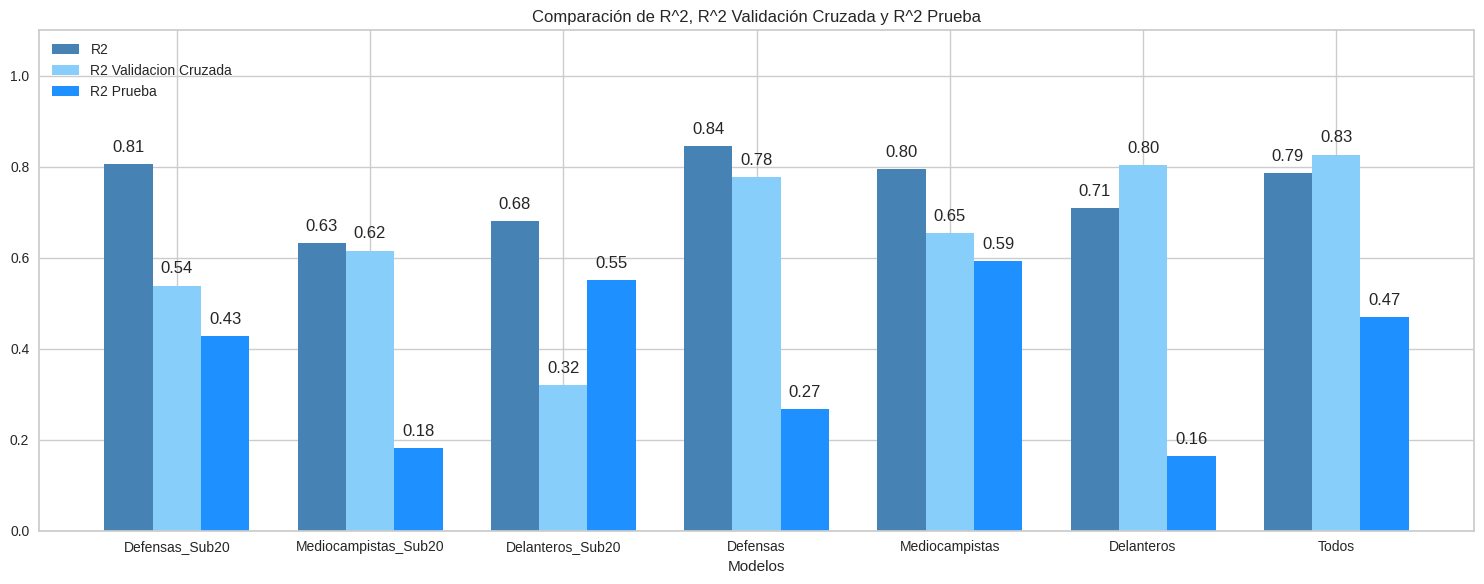

In [ ]:
# Datos del DataFrame
modelos = Resultados['Modelo']
R2 = np.abs(Resultados['R2'])  # Convertir a valor absoluto
R2_Validacion_Cruzada = np.abs(Resultados['R2_Validacion'])  # Convertir a valor absoluto
R2_Prueba = np.abs(Resultados['R2_Prueba'])

# Configuración del gráfico
width = 0.25  # Ancho de las barras
x = np.arange(len(modelos))  # Posiciones en el eje X

# Definir tonos de azul para cada R2
colors = ['#4682B4', '#87CEFA', '#1E90FF']  # Colores para R2, R2 Validación y R2 Prueba

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(15, 6))

# Crear las barras
bar1 = ax.bar(x - width, R2, width, label='R2', color=colors[0])  # Color para R2
bar2 = ax.bar(x, R2_Validacion_Cruzada, width, label='R2 Validacion Cruzada', color=colors[1])  # Color para R2 Validación
bar3 = ax.bar(x + width, R2_Prueba, width, label='R2 Prueba', color=colors[2])  # Color para R2 Prueba

# Configuración de etiquetas y título
ax.set_xlabel('Modelos')
ax.set_title('Comparación de R^2, R^2 Validación Cruzada y R^2 Prueba')
ax.set_xticks(x)
ax.set_xticklabels(modelos)

# Establecer el rango del eje Y de 0 a 1
ax.set_ylim(bottom=0, top=1.1)

# Agregar etiquetas de datos en las barras
for i in range(len(modelos)):
    ax.text(x[i] - width, R2[i] + 0.02, f'{R2[i]:.2f}', ha='center', va='bottom')
    ax.text(x[i], R2_Validacion_Cruzada[i] + 0.02, f'{R2_Validacion_Cruzada[i]:.2f}', ha='center', va='bottom')
    ax.text(x[i] + width, R2_Prueba[i] + 0.02, f'{R2_Prueba[i]:.2f}', ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

## VIZUALIZACION COEFICIENTES VALIDACION RMSE

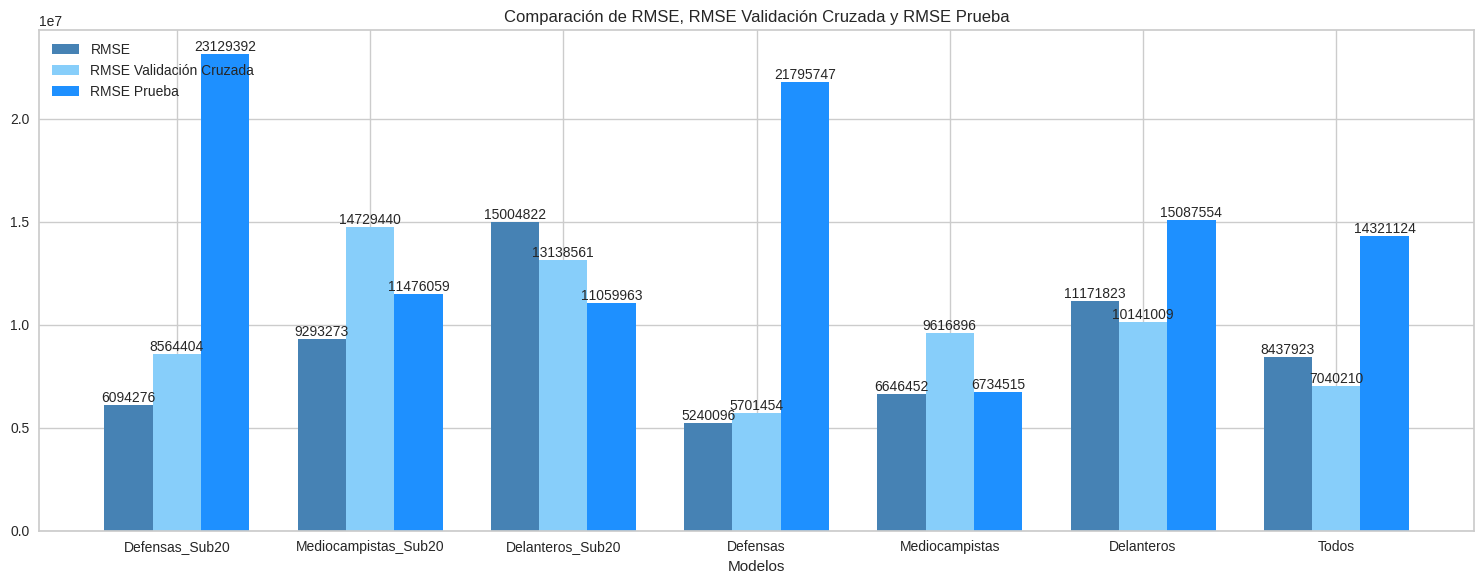

In [ ]:

# Datos del DataFrame
modelos = Resultados['Modelo']
RMSE = np.abs(Resultados['RMSE'])  # Convertir a valor absoluto
RMSE_Validacion_Cruzada = np.abs(Resultados['RMSE_Validacion'])  # Convertir a valor absoluto
RMSE_Prueba = np.abs(Resultados['RMSE_Prueba'])  # Convertir a valor absoluto

# Configuración del gráfico
width = 0.25  # Ancho de las barras
x = np.arange(len(modelos))  # Posiciones en el eje X

# Definir tonos de azul para cada R2
colors = ['#4682B4', '#87CEFA', '#1E90FF']

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(15, 6))

# Crear las barras
bar1 = ax.bar(x - width, RMSE, width, label='RMSE', color=colors[0])  # Color para RMSE
bar2 = ax.bar(x, RMSE_Validacion_Cruzada, width, label='RMSE Validación Cruzada', color=colors[1])  # Color para RMSE Validación
bar3 = ax.bar(x + width, RMSE_Prueba, width, label='RMSE Prueba', color=colors[2])  # Color para RMSE Prueba

# Configuración de etiquetas y título
ax.set_xlabel('Modelos')
ax.set_title('Comparación de RMSE, RMSE Validación Cruzada y RMSE Prueba')
ax.set_xticks(x)
ax.set_xticklabels(modelos)

# Agregar etiquetas de datos en las barras
for i in range(len(modelos)):
    ax.text(x[i] - width, RMSE[i] + 0.02, f'{RMSE[i]:.0f}', ha='center', va='bottom', fontsize=10)  # Un decimal, tamaño de fuente 8
    ax.text(x[i], RMSE_Validacion_Cruzada[i] + 0.02, f'{RMSE_Validacion_Cruzada[i]:.0f}', ha='center', va='bottom', fontsize=10)  # Un decimal, tamaño de fuente 8
    ax.text(x[i] + width, RMSE_Prueba[i] + 0.02, f'{RMSE_Prueba[i]:.0f}', ha='center', va='bottom', fontsize=10)  # Un decimal, tamaño de fuente 8

# Mostrar el gráfico
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()

In [ ]:
Resultados

,Modelo,R2,RMSE,R2_Validacion,RMSE_Validacion,R2_Prueba,RMSE_Prueba
0,Defensas_Sub20,0.805743,6094276.248687,0.539,-8564404.265,-0.427006,23129391.661591
1,Mediocampistas_Sub20,0.631801,9293272.990424,0.616,-14729440.144,-0.181071,11476059.201619
2,Delanteros_Sub20,0.680879,15004822.294486,0.321,-13138560.568,0.550651,11059962.643095
3,Defensas,0.844842,5240096.167637,0.778,-5701453.812,-0.267188,21795746.768379
4,Mediocampistas,0.79578,6646452.480651,0.654,-9616896.468,0.593273,6734514.767501
5,Delanteros,0.709916,11171823.248285,0.803,-10141008.746,0.163792,15087554.021277
6,Todos,0.786729,8437922.835551,0.827,-7040210.121,0.468771,14321124.360184


In [ ]:
Z_DEFENSAS

,Edad,PJ,Titular,Min,90 s,Gls,Ast,G+A,G-TP,TP,...,Int,TklG,Penal ejecutado,Penal concedido,GC,Recup,DA_Ganados,Da_Perdidos,Precio 2022-2023,Predicciones
931,19,5,3,299.0,3.3,0,0,0,0,0,...,3,2,0,0,0,18,1,3,20000000,3.049976e+07
932,19,10,3,310.0,3.4,0,0,0,0,0,...,1,8,0,0,0,22,2,4,3000000,3.482328e+06
933,16,13,8,769.0,8.5,0,0,0,0,0,...,18,5,0,0,0,41,12,8,10000000,9.969725e+06


In [ ]:
Z_MEDIOCAMPISTAS

,Edad,PJ,Titular,Min,90 s,Gls,Ast,G+A,G-TP,TP,...,AGC,AGC90,AGC_Balon_vivo,AGC_Balon_muerto,AGC_HASTA,AGC_Dis,AGC_FR,AGC_Def,Precio 2022-2023,Predicciones
820,20,1,0,5.000,0.1,0,0,0,0,0,...,0,0.00,0,0,0,0,0,0,600000,1.994544e+06
821,20,36,28,2.294,25.5,11,4,15,11,0,...,8,0.31,6,0,2,0,0,0,30000000,4.350500e+07
822,20,1,0,4.000,0.0,0,0,0,0,0,...,2,0.18,1,0,0,0,1,0,6000000,1.305644e+07


In [ ]:
Z_DELANTEROS

,Edad,PJ,Titular,Min,90 s,Gls,Ast,G+A,G-TP,TP,...,Int,TklG,Penal ejecutado,Penal concedido,GC,Recup,DA_Ganados,Da_Perdidos,Precio 2022-2023,Predicciones
614,20,28,12,1.426,15.8,4,2,6,4,4,...,13,20,1,0,0,90,5,17,15000000,18961000.0
615,20,36,32,2.656,29.5,6,4,10,6,3,...,8,16,1,0,0,147,20,27,30000000,41180000.0
616,19,33,29,2.513,27.9,19,5,24,18,8,...,3,3,2,0,0,47,20,78,35000000,38420000.0


In [ ]:
Z_DF

,Edad,PJ,Titular,Min,90 s,Gls,Ast,G+A,G-TP,TP,...,Equipo_Werder Bremen,Equipo_West Ham,Equipo_Wolfsburg,Equipo_Wolves,Comp_Bundesliga,Comp_La Liga,Comp_Ligue 1,Comp_Premier League,Comp_Serie A,Predicciones
2365,19,5,3,299.0,3.3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2.760082e+07
2366,19,10,3,310.0,3.4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.089874e+07
2367,16,13,8,769.0,8.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.334729e+07


In [ ]:
Z_MC

,Edad,PJ,Titular,Min,90 s,Gls,Ast,G+A,G-TP,TP,...,Equipo_Werder Bremen,Equipo_West Ham,Equipo_Wolfsburg,Equipo_Wolves,Comp_Bundesliga,Comp_La Liga,Comp_Ligue 1,Comp_Premier League,Comp_Serie A,Predicciones
2368,20,1,0,5.000,0.1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.332264e+06
2369,20,36,28,2.294,25.5,11,4,15,11,0,...,0,0,0,0,0,1,0,0,0,3.628335e+07
2370,20,1,0,4.000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.771554e+06


In [ ]:
Z_DC

,Edad,PJ,Titular,Min,90 s,Gls,Ast,G+A,G-TP,TP,...,Equipo_Werder Bremen,Equipo_West Ham,Equipo_Wolfsburg,Equipo_Wolves,Comp_Bundesliga,Comp_La Liga,Comp_Ligue 1,Comp_Premier League,Comp_Serie A,Predicciones
2371,20,28,12,1.426,15.8,4,2,6,4,0,...,0,0,0,0,0,0,0,1,0,1.441242e+07
2372,20,36,32,2.656,29.5,6,4,10,6,0,...,0,0,0,0,0,1,0,0,0,3.712654e+07
2373,19,33,29,2.513,27.9,19,5,24,18,1,...,0,0,0,0,0,0,1,0,0,4.633520e+07


In [ ]:
Z

,Edad,PJ,Titular,Min,90 s,Gls,Ast,G+A,G-TP,TP,...,Equipo_Werder Bremen,Equipo_West Ham,Equipo_Wolfsburg,Equipo_Wolves,Comp_Bundesliga,Comp_La Liga,Comp_Ligue 1,Comp_Premier League,Comp_Serie A,Predicciones
2365,19,5,3,299.000,3.3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3.453291e+07
2366,19,10,3,310.000,3.4,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,8.837087e+06
2367,16,13,8,769.000,8.5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.468856e+07
2368,20,1,0,5.000,0.1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.267408e+06
2369,20,36,28,2.294,25.5,11,4,15,11,0,...,0,0,0,0,0,1,0,0,0,3.637336e+07
2370,20,1,0,4.000,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,8.580937e+06
2371,20,28,12,1.426,15.8,4,2,6,4,0,...,0,0,0,0,0,0,0,1,0,1.485116e+07
2372,20,36,32,2.656,29.5,6,4,10,6,0,...,0,0,0,0,0,1,0,0,0,4.068129e+07
2373,19,33,29,2.513,27.9,19,5,24,18,1,...,0,0,0,0,0,0,1,0,0,3.966826e+07


In [ ]:
del Resultados